 # Back Propagation

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
dataset = make_circles(n_samples=5000)
end_training_set = int(5000 * 80/100)
training_set = (dataset[0][:end_training_set],dataset[1][:end_training_set])
test_set = (dataset[0][end_training_set:],dataset[1][end_training_set:])

In [3]:
samples, membership = training_set
X = samples[:,0]
Y = samples[:,1]


In [4]:
def counter(N):
    i = 0
    while i<N:
        yield i
        i+=1

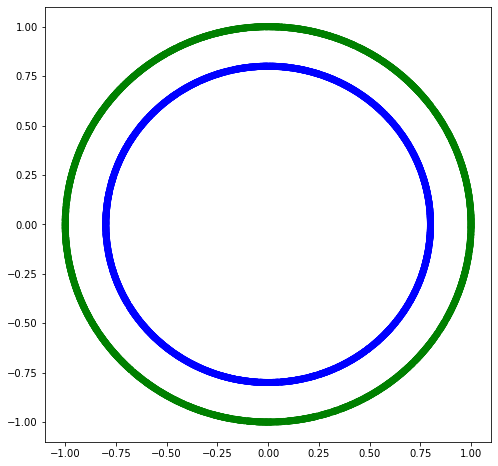

In [5]:
plt.figure(figsize=(8,8))
col = np.where(membership[list(counter(len(samples)))]==0,'g','b')
plt.scatter(X,Y,c=col)
plt.show()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def lin(x):
    return 4*x + 3

def d_lin(x):
    return torch.tensor([4],dtype=torch.float32)

In [7]:
import torch
import torch.nn as nn

In [21]:
class Neural_Network(nn.Module):
    def __init__(self, activation, d_activation,lr=1.0):
        super(Neural_Network, self).__init__()
        self.inputSize = 2
        self.hiddenSize = 10
        self.outputSize = 1
        self.lr = lr

        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize)
        self.W2 = torch.randn(self.hiddenSize, self.outputSize)
        self.b1 = torch.randn(1, self.hiddenSize)
        self.b2 = torch.randn(1, self.outputSize)
        self.activation = activation
        self.d_activation = d_activation


    def forward(self, X):
        self.z1 = torch.matmul(X, self.W1)+self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = torch.matmul(self.a1, self.W2) +self.b2
        self.a2 = self.activation(self.z2)
        return self.a2

    def backpropagate(self,X, a2, y_target):
        # commencer par:
        dE_da2 = a2 - y_target
        dE_dz2 = dE_da2 * self.d_activation(self.z2)
        
        #grad W2 and b2
        dE_W2 = dE_dz2 @ self.a1
        dE_b2 = dE_dz2
        
        #grad W1 and b1
        dE_da1 = torch.matmul(dE_dz2, torch.t(self.W2))
        dE_W1 = torch.matmul(X.float().reshape(2,1),self.d_activation(self.z1)*dE_da1)
        if self.activation == sigmoid:
            dE_b1 = dE_dz2 * np.matmul(self.d_activation(self.z1), self.W2)
        else:
            dE_b1 = dE_dz2 * self.d_activation(self.z1)* self.W2 
       
        
        #update W1 and b1
        
        self.W1 -= self.lr * dE_W1
        if self.activation == sigmoid:
            self.b1 -= self.lr * dE_b1
        else:
            self.b1 -= self.lr * dE_b1.reshape(self.b1.size())
        self.W2 -= self.lr * dE_W2.reshape(10,1)
        self.b2 -= self.lr * dE_b2
        
        
        
        pass
 

In [22]:
model = Neural_Network(sigmoid,d_sigmoid)

In [23]:
def E(y_pred,y):
    return 0.5 * (y_pred - y)*2

In [24]:
def prediction(x):
    if x>0.5:
        return 1
    return 0

In [25]:
def trainer(dataset, model, loss_fn=E, epoch=20,batch_size=16,rate= 1e-3):
    points = dataset[0]
    targets= dataset[1]
    
    dataset = [(i,j) for (i,j) in enumerate(points)]
    data = torch.utils.data.DataLoader(dataset,batch_size=16)
    for t in tqdm(range(epoch),total=epoch,desc='epoch'):
        for batch in tqdm(data,total=len(data),desc='inside'):
            index = batch[0]
            point = batch[1]
            L = 0 
            for i in range(len(batch)):
                y = targets[index[i]]
                y_pred = model(point[i].float())
                model.backpropagate(point[i],y_pred,y)
                L += loss_fn(prediction(y_pred),y)
        print("current loss is: ",L)

In [26]:
trainer(training_set,model)

<ipython-input-25-0bee28c635d9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm(range(epoch),total=epoch,desc='epoch'):


<ipython-input-25-0bee28c635d9>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(data,total=len(data),desc='inside'):



current loss is:  0.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  1.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



In [27]:
def measure_success(model,test_data):
    points = test_data[0]
    targets= test_data[1]
    counter = 0
    dataset = [(i,j) for (i,j) in enumerate(points)]
    for (index,point) in dataset:
        if prediction(model(torch.tensor(point,dtype=torch.float32))) == targets[index]:
            counter += 1
    return counter/len(points)

In [28]:
measure_success(model,test_set)

1.0

In [29]:
model =  Neural_Network(lin,d_lin)
trainer(training_set,model)

<ipython-input-25-0bee28c635d9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm(range(epoch),total=epoch,desc='epoch'):


<ipython-input-25-0bee28c635d9>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(data,total=len(data),desc='inside'):



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



current loss is:  0.0



In [30]:
measure_success(model,test_set)

0.521

In [34]:
samples, _ = test_set
X = samples[:,0]
Y = samples[:,1]

In [35]:
membership =[]
for p in test_set[0]:
    membership.append(prediction(model(torch.tensor(p,dtype=torch.float32))))

membership = np.array(membership)

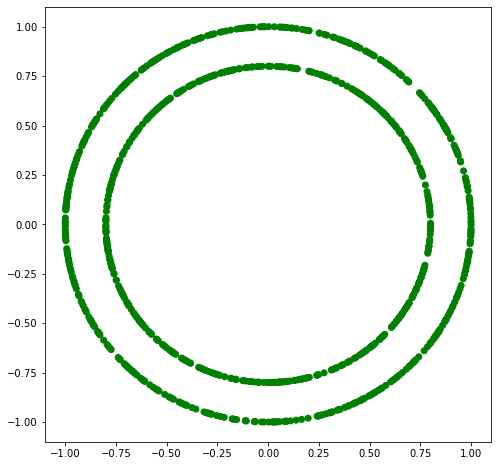

In [36]:
plt.figure(figsize=(8,8))
col = np.where(membership[list(counter(len(samples)))]==0,'g','b')
plt.scatter(X,Y,c=col)
plt.show()

 # Initialisation des poids

In [37]:
import torch
from torchvision import transforms
from torchvision import datasets

In [38]:
training_data = datasets.FashionMNIST(".",download=True,train=True)

test_data = datasets.FashionMNIST(".",download=True,train=False)
N = len(training_data)
N2 = len(test_data)
#training_data_tensor =[transforms.Compose([transforms.Resize((784,1)),transforms.ToTensor(),])(training_data[1][0]) 
#                                           for i in range(100)]

training_data =[(torch.flatten(transforms.ToTensor()(training_data[i][0])),torch.tensor([training_data[i][1]],dtype = torch.float32))
                                           for i in range(N)]


test_data =[(torch.flatten(transforms.ToTensor()(test_data[i][0])),torch.tensor([test_data[i][1]],dtype = torch.float32))
                                           for i in range(N2)]

In [39]:
class Net(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Net, self).__init__() ##?
        self.linear = torch.nn.Linear(784,128)
        self.hidden = torch.nn.Linear(128,64)
        self.hidden2= torch.nn.Linear(64,10)
        self.LogSoftmax = torch.nn.LogSoftmax(1)
        self.Relu = torch.relu
        self.sig = torch.sigmoid
        self.tanh = torch.tanh

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        first_layer  = self.linear(x.reshape(1,784))
        hidden_layer = self.Relu(self.hidden(first_layer))
        hidden_layer2= self.hidden2(hidden_layer)
        y_pred = self.LogSoftmax(hidden_layer2)
        return y_pred

N = 16
# Construct our model by instantiating the class defined above
model = Net()

In [40]:
def xavier(w):
    fan_in,fan_out = w.size()
    with torch.no_grad():
        W = np.random.randn(fan_in,fan_out)/np.sqrt(fan_in)
        return torch.tensor(W)

In [41]:
 net= Net()
def init_weights(m):
    if type(m) == nn.Linear:
        xavier(m.weight)
net.apply(init_weights)


Net(
  (linear): Linear(in_features=784, out_features=128, bias=True)
  (hidden): Linear(in_features=128, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=10, bias=True)
  (LogSoftmax): LogSoftmax(dim=1)
)

In [42]:
Loss = []
def My_trainer(dataset, model, loss_fn,batch_size, epoch=10,rate= 1e-4):
    optimizer = torch.optim.Adam(model.parameters(),lr=rate)
    data = torch.utils.data.DataLoader(dataset,batch_size=batch_size)
    
    for t in tqdm(range(epoch),total=epoch,desc='epoch'):
        for couple_x_y in tqdm(data,total=len(data),desc='inside'):
            # Forward pass: Compute predicted y by passing x to the model
            x,y = couple_x_y[0][0],couple_x_y[1][0]
            y_pred = model(x)
            # Compute and print loss
            loss = loss_fn(y_pred, y.long())
            Loss.append(loss.item())
            # Zero gradients, perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [43]:
My_trainer(training_data,model,torch.nn.NLLLoss(),N)

<ipython-input-42-999b23524ca4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm(range(epoch),total=epoch,desc='epoch'):


<ipython-input-42-999b23524ca4>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for couple_x_y in tqdm(data,total=len(data),desc='inside'):


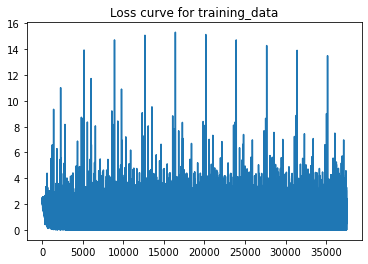

In [44]:
N = len(Loss)
plt.plot(np.linspace(0,N,N),Loss)
plt.title("Loss curve for training_data")
plt.show()

In [45]:

def success_rate_BetterNet(model,test_data):
    Acc = []
    data = torch.utils.data.DataLoader(test_data,batch_size=1)
    counter = 0
    N = 0
    loss_fn = torch.nn.NLLLoss()
    for couple_x_y in data:
        x,y = couple_x_y
        y_pred = model(x)
        values,index = y_pred.max(1)
        #loss = loss_fn(y_pred, y.long())
        if index ==y.item():
            
            counter += 1
        N +=1
        Acc.append(counter/N)
    return (counter/N, Acc)

In [46]:
precision,Acc = success_rate_BetterNet(model,test_data)

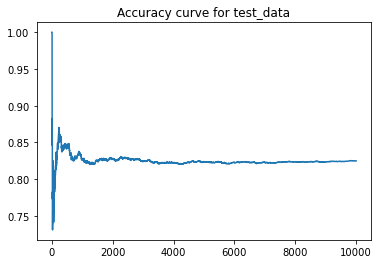

In [47]:
N = len(test_data)
plt.plot(np.linspace(0,N,N),Acc)
plt.title("Accuracy curve for test_data")
plt.show()

In [48]:
precision_t, Acc_t = success_rate_BetterNet(model,training_data)
precision

0.8247

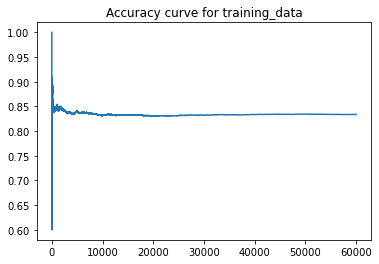

In [49]:
N = len(training_data)
plt.plot(np.linspace(0,N,N),Acc_t)
plt.title("Accuracy curve for training_data")
plt.show()